In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymysql
import sqlalchemy 
import socket
from sqlalchemy import create_engine, MetaData, Table, Column, Integer, Float, DateTime



# Test for network availablility first!

''' This first function will test for network, 
server and port connection before anything else'''
def is_reachable(host, port):
    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    s.settimeout(1)
    try:
        s.connect((host, port))
        s.close()
        return True
    except:
        return False

host = "172.17.0.3"
port = 3306

if is_reachable(host, port):
    print("Host is reachable")
else:
    print("Host is not reachable")


# Set up our connection to the database and create a new table.

''' Here we will set up our connection
to our mysql database that currently is being served 
at 172.17.0.3:3306 by a MySQL container that we have already 
started before running this python script.'''

user = 'root'
password = 'root'
host =  '172.17.0.3'
port = 3306
database = 'KAFKA_DB'

metadata = MetaData()

ingest_table = Table(
    'INGEST_PANDAS_PROCESSED_1', 
    metadata, 
    Column('time', DateTime),
    Column('seconds_elapsed', Float),
    Column('qz', Float),
    Column('qy', Float),
    Column('qx', Float),
    Column('qw', Float),
    Column('roll', Float),
    Column('pitch', Float),
    Column('yaw', Float)
)

engine = sqlalchemy.create_engine("mysql+pymysql://{}:{}@{}:{}/{}".format(user, password, host, port, database))
conn = engine.connect()

metadata = MetaData()
conn = engine.connect()
metadata.create_all(engine)

# Load our dataset into a Pandas Dataframe for advanced manipulations.
df = pd.read_csv(r"./../datasets/Orientation.csv")
df.head(5)


# Now save our processed Dataframe to the database
def processed_1():
    try:
        df.to_sql(
            name='INGEST_PANDAS_PROCESSED_1',
            con=engine,
            if_exists = 'replace',
            chunksize=200000,
            index=False)
        print('Successfully written to: ', database, "!!")

    except Exception as e:
        print(e)

processed_1()       

conn.close()


Host is reachable
Successfully written to:  KAFKA_DB !!


In [28]:
df.columns

Index(['time', 'seconds_elapsed', 'qz', 'qy', 'qx', 'qw', 'roll', 'pitch',
       'yaw'],
      dtype='object')

<Axes: ylabel='Density'>

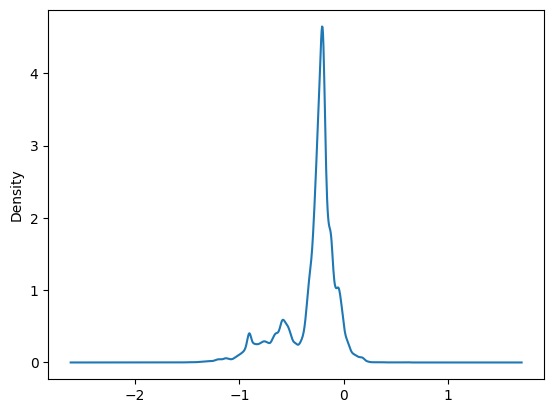

In [59]:
df.pitch.plot.kde()
#df.head(1000).pitch.plot.kde()

<Axes: >

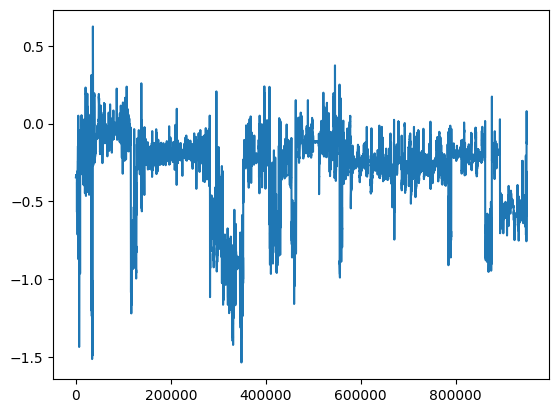

In [58]:
df.pitch.plot.line()

<Axes: >

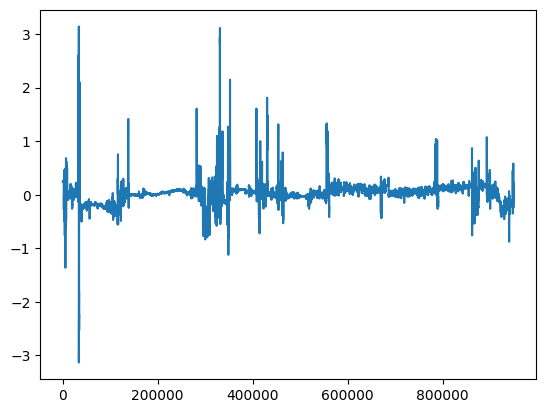

In [60]:
df.roll.plot.line()

In [ ]:
to_dbase = df.to_sql(conn: )
df.to_sql(con=con, name='INGEST_PROCESSED_1', if_exists='append', schema= 'default', method='callable', chunksize=200000, flavor='mysql')